<a href="https://colab.research.google.com/github/anjoya/Autolib/blob/new/Autolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats


#importing of libraries relevant to manipulation(numpy nad pandas) and visualization of data(matplolib,seaborn,pyplot)

In [2]:
#loading of the data and previewing
data=pd.read_csv("/content/autolib_daily_events_postal_code.csv")
data


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [ ]:
#no missing data in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [6]:
#changing the date column to date format
data['date']=pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

In [16]:
#removing the columnd that are not needed.
data=data.drop(columns=['n_daily_data_points', 'Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum'])
data

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,2018-01-01,0,weekday,110,103
1,75001,2018-01-02,1,weekday,98,94
2,75001,2018-01-03,2,weekday,138,139
3,75001,2018-01-04,3,weekday,104,104
4,75001,2018-01-05,4,weekday,114,117
...,...,...,...,...,...,...
16080,95880,2018-06-15,4,weekday,15,10
16081,95880,2018-06-16,5,weekend,19,19
16082,95880,2018-06-17,6,weekend,33,35
16083,95880,2018-06-18,0,weekday,11,14


In [17]:
#Retaining the weekday data

weekdaydf=data[data['day_type']=='weekday']
weekdaydf.sort_values('date')


,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,2018-01-01,0,weekday,110,103
2652,75018,2018-01-01,0,weekday,438,467
14214,94220,2018-01-01,0,weekday,43,48
11180,93300,2018-01-01,0,weekday,12,13
2496,75017,2018-01-01,0,weekday,634,671
...,...,...,...,...,...,...
12191,93400,2018-06-19,1,weekday,9,14
5144,92130,2018-06-19,1,weekday,12,15
2495,75016,2018-06-19,1,weekday,36,40
12342,93440,2018-06-19,1,weekday,1,2


In [45]:
#Getting the dataframe for postal codes 75005 and 75009
areas=[75005,75009]

df=weekdaydf[weekdaydf['Postal code'].isin(areas)]
df

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
624,75005,2018-01-01,0,weekday,280,283
625,75005,2018-01-02,1,weekday,257,257
626,75005,2018-01-03,2,weekday,280,269
627,75005,2018-01-04,3,weekday,217,220
628,75005,2018-01-05,4,weekday,260,252
...,...,...,...,...,...,...
1397,75009,2018-06-13,2,weekday,326,325
1398,75009,2018-06-14,3,weekday,332,325
1399,75009,2018-06-15,4,weekday,321,328
1402,75009,2018-06-18,0,weekday,304,274


In [68]:
#getting the data for postal code 75005
group=df.groupby('Postal code')
df1=group.get_group(75005)
df1

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
624,75005,2018-01-01,0,weekday,280,283
625,75005,2018-01-02,1,weekday,257,257
626,75005,2018-01-03,2,weekday,280,269
627,75005,2018-01-04,3,weekday,217,220
628,75005,2018-01-05,4,weekday,260,252
...,...,...,...,...,...,...
773,75005,2018-06-13,2,weekday,335,317
774,75005,2018-06-14,3,weekday,287,297
775,75005,2018-06-15,4,weekday,312,316
778,75005,2018-06-18,0,weekday,299,284


In [70]:
#Getting the data for 75009
df2=group.get_group(75009)
df2

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
1248,75009,2018-01-01,0,weekday,336,336
1249,75009,2018-01-02,1,weekday,266,258
1250,75009,2018-01-03,2,weekday,324,309
1251,75009,2018-01-04,3,weekday,335,335
1252,75009,2018-01-05,4,weekday,378,360
...,...,...,...,...,...,...
1397,75009,2018-06-13,2,weekday,326,325
1398,75009,2018-06-14,3,weekday,332,325
1399,75009,2018-06-15,4,weekday,321,328
1402,75009,2018-06-18,0,weekday,304,274


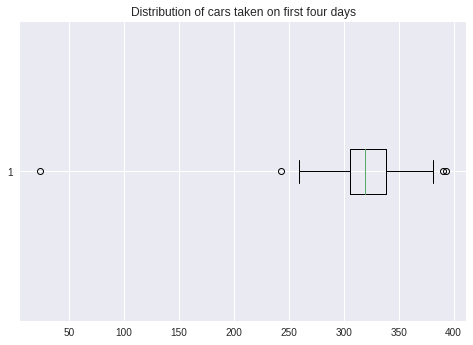

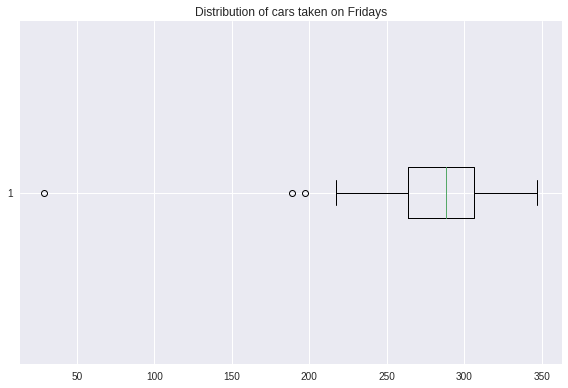

In [58]:
#using matplolib to identify outliers. In both datasets there are very few outliers
plt.style.use('seaborn')
fig1, ax1=plt.subplots()
fig2, ax2=plt.subplots()
ax1.boxplot(x=df1['BlueCars_taken_sum'], vert=False)
ax1.set_title('Distribution of cars taken on first four days')
plt.tight_layout()
ax2.boxplot(x=df2['BlueCars_taken_sum'],vert=False)
ax2.set_title('Distribution of cars taken on Fridays')
plt.tight_layout()

### Univariate analysis

In [69]:
df1.describe()

,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
count,112.0,112.000000,112.000000,112.000000
mean,75005.0,1.973214,282.857143,281.428571
std,0.0,1.423483,39.177089,38.406014
min,75005.0,0.000000,29.000000,17.000000
25%,75005.0,1.000000,263.500000,260.750000
50%,75005.0,2.000000,288.500000,288.500000
75%,75005.0,3.000000,306.250000,305.000000
max,75005.0,4.000000,347.000000,343.000000


In [172]:
print(df1['BlueCars_returned_sum'].mode()) 
print(df1['BlueCars_returned_sum'].skew())
print(df1['BlueCars_returned_sum'].kurt())

0    250
1    287
2    298
dtype: int64
-3.1354019504699235
19.301888931408374


In [71]:
df2.describe()

,Postal code,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum
count,112.0,112.000000,112.000000,112.000000
mean,75009.0,1.973214,319.839286,313.071429
std,0.0,1.423483,40.237483,41.058893
min,75009.0,0.000000,24.000000,16.000000
25%,75009.0,1.000000,305.500000,297.750000
50%,75009.0,2.000000,319.500000,313.000000
75%,75009.0,3.000000,338.500000,334.250000
max,75009.0,4.000000,393.000000,387.000000


In [173]:
print(df2['BlueCars_returned_sum'].mode()) 
print(df2['BlueCars_returned_sum'].kurt())
print(df2['BlueCars_returned_sum'].skew())

0    302
1    308
dtype: int64
23.798283804380024
-3.36262231279375


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


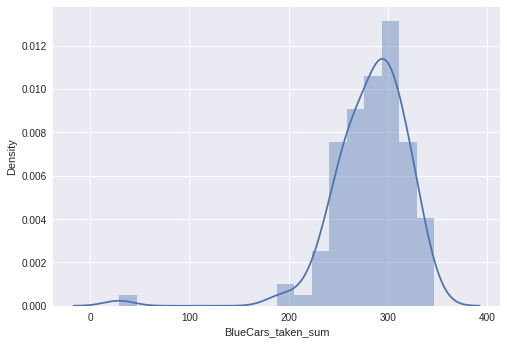

In [73]:
sns.distplot(df1['BlueCars_taken_sum'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


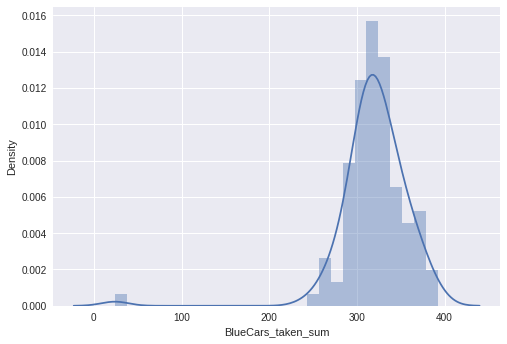

In [74]:
sns.distplot(df2['BlueCars_taken_sum'])



*   The average number of cars taken over the weekday in postal code 75005 is 282 vs 319 for 75009
*   Half of the blue cars taken in a weekday in postal 75005 are below 288 vs 319 in 75009


*   Three quarters of the number of blue cars taken in 75005 is are below 306 vs 338 for postal code 75009
*   From this we can say that area 75009 generally has a higher demand for cars.




# Bivariate

Analysis by postal code

In [111]:

daygroup=df.groupby('dayOfWeek')
byday=daygroup['BlueCars_taken_sum'].sum()
byday

dayOfWeek
0    13583
1    13612
2    13458
3    12969
4    13880
Name: BlueCars_taken_sum, dtype: int64

Text(0, 0.5, 'blue cars taken')

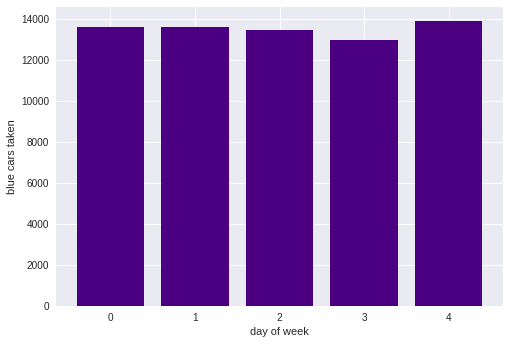

In [118]:
#Total number of cars by day of week
days=daygroup['dayOfWeek'].unique()
days
plt.bar(days,byday, color='indigo')
plt.legend()
plt.xlabel('day of week')
plt.ylabel('blue cars taken')

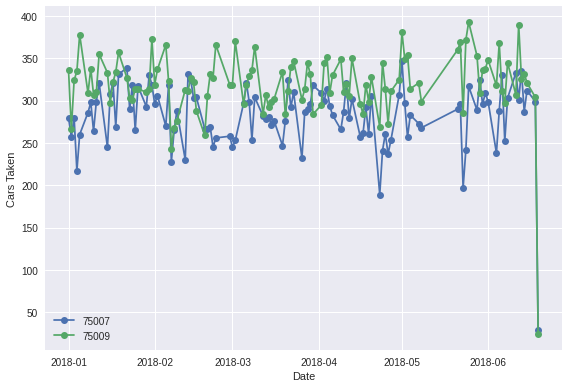

In [124]:
#Ploting a graph comparing the number of blue cars taken in postal code 75005 vs 75009 over time
plt.plot_date(x=df1['date'], y=df1['BlueCars_taken_sum'], linestyle='solid', label='75007')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cars Taken')
plt.tight_layout()

plt.plot_date(x=df2['date'], y=df2['BlueCars_taken_sum'], linestyle='solid', label='75009')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cars Taken')
plt.tight_layout()


Postal code
75005    31680
75009    35822
Name: BlueCars_taken_sum, dtype: int64

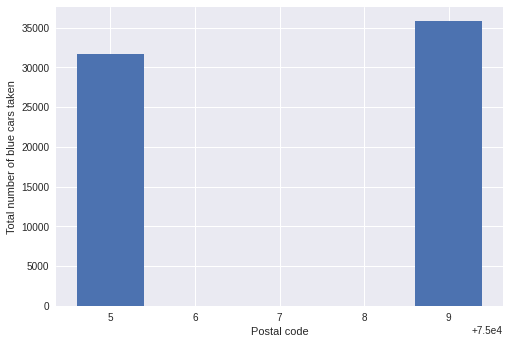

In [164]:
#ploting the blue cars taken by postal code
bypostal=df.groupby('Postal code')
postalsum=bypostal['BlueCars_taken_sum'].sum()
postal=bypostal['Postal code'].unique()
postal
plt.bar(postal,postalsum)
plt.legend()
plt.xlabel('Postal code')
plt.ylabel('Total number of blue cars taken')
postalsum

# **HYPOTHESIS TESTING**
The dataset we are working with is from the autolib network,a public electric car-sharing program/service.

We are investigating a claim that the number of blue cars taken on a weekday from area 75009 are more than those taken fron 75005

H0:u=282
H1:u>282

We are working with a confidence level of 95%.


Checking for normality using the shapiro wilk test

In [180]:
from scipy.stats import shapiro 

# test for normality
shapiro(df1['BlueCars_taken_sum'])
# P value is less than 0.05 so reject normality


ShapiroResult(statistic=0.8268665075302124, pvalue=3.896571121320136e-10)

In [181]:
shapiro(df2['BlueCars_taken_sum'])

# P value is less than 0.05 so reject normality

ShapiroResult(statistic=0.755158543586731, pvalue=2.2169369204988465e-12)

since the data is not normally distributed we result to a non parametric test:Mann–Whitney U test


In [184]:
from scipy.stats import mannwhitneyu
x = df1['BlueCars_taken_sum']
y = df2['BlueCars_taken_sum']

mannwhitneyu(x,y)

MannwhitneyuResult(statistic=2428.5, pvalue=2.280302036143411e-15)

Since the p value is less than our confidence interval we reject the null hypothesis